## Predictive Modeling

In [22]:
#Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
#from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import average_precision_score

In [23]:
#rearrange the columns and get rid of useless columns
cols = df.columns.tolist()
cols = cols[1:-3]+[cols[-1]]+ [cols[-3]]
print(cols)
df_1 = df[cols]
print(df_1.head(2))
#preparing training and testing for all later models
#won't hurt to scale, so I'm just scaling for all
X = df_1.iloc[:, :-1].values
y = df_1.iloc[:, -1].values
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print('training dataset shape: ' + str(X_train.shape))
print(X_train[100],y_train[100]) #see an example of training data

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'hour', 'Class']
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9       V10  ...         V22       V23       V24  \
0  0.098698  0.363787  0.090794  ...    0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ...   -0.638672  0.101288 -0.339846   

        V25       V26       V27       V28  Amount  hour  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62     0      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69     0      0  

[2 rows x 31 columns]
training dataset shape: (213605, 30)
[ 0.63597216  0.10111697  0.32204781  0.44871611 -0.407737   -0.7589104
  0.01208695 -0

In [ ]:
#### MODEL 1: SVM
"""
param_dist = {"C":[0.1,1,10],
              "kernel":['poly','rbf', 'sigmoid'],
              "gamma":[0.01,0.02, 0.03, 0.05, 0.1]}
svm = SVC()
svm_cv = GridSearchCV(svm, param_dist, cv=5)
svm_cv.fit(X_train,y_train)

print("Tuned SVM Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))
#Tuned SVM Parameters: {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
#Best score is 0.999499075396
"""
#Tuned SVM Parameters: {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
#Best score is 0.999499075396
#Took too long so here is the direct result 

confusion matrix: [[71076     6]
 [   26    94]]


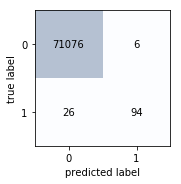

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.94      0.78      0.85       120

avg / total       1.00      1.00      1.00     71202



In [24]:
# Using tuned parameters from GridSearch Cross Validation
svm_b = SVC(kernel = 'rbf', C= 10, gamma= 0.01, probability=True, random_state = 0)
svm_b.fit(X_train, y_train)
y_pred = svm_b.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('confusion matrix: '+str(cm))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(classification_report(y_test, y_pred))

[0.00045904 0.00060946 0.00021256 0.0001302  0.00035155 0.0002489
 0.00015761 0.00061722 0.00041284 0.00019808]
0

 test auc: 0.9381004801965804


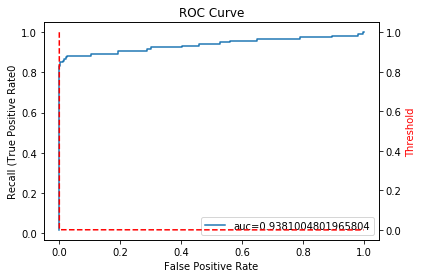

In [25]:
#mini-function to plot ROC_AUC curve
def auc_plot(y_real, y_cal):
    fpr, tpr, th = roc_curve(y_real,  y_cal)
    auc = roc_auc_score(y_real, y_cal)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall (True Positive Rate)')
    #plt.show()
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, th, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    plt.show()

y_pred_prob = svm_b.predict_proba(X_test)[:,1]
print(y_pred_prob[:10])
print(y_test[1])    
auc = roc_auc_score(y_test, y_pred_prob)
print("\n test auc:", auc)
auc_plot(y_test, y_pred_prob)

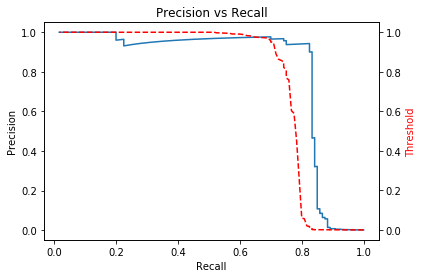

In [26]:
# mini-function plot precision-recall curve
def pre_recall_plot(y_test, y_cal):
    preci, reca, th = precision_recall_curve(y_test, y_cal)
    #print(len(reca)) 1 more length than threshold
    #print(len(preci)) 1 more length than threshold
    #print(len(th))
    plt.plot(reca[:-1], preci[:-1], label='Precision-Recall curve')
    plt.title('Precision vs Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    ax2 = plt.gca().twinx()
    ax2.plot(reca[:-1], th, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    plt.show()   

pre_recall_plot(y_test, y_pred_prob) 

Recall measures: how many true positives (fraud) are actually predicted as positives.
Precision measures: how many predicted positives are actually positives(fraud). 
So for a fraud detection model, our principle should be to detect all possible frauds (highest possible recall) and at the same time reasonably high proportion of frauds among those predicted as frauds. 

The confusion matrix gives us the predicted class results, and the classification report gives us the result metrics weighted by support (the number of true instances for each label). As we can see here, SVM classifier with tuned parameters gives us an average 0.78 recall and 0.94 precision, which means approximately among 100 true frauds, 78 can be detected; and among 100 frauds alerted by the model, 94 of them are actual frauds.

The ROC and Precision-Recall curve gives us a direct view of how those metrics change with different threshold settings.(3)(4)(5) So in general, we want to set a threshold that result in best possible recall and precision. For ROC curve, the optimal point should be upper left corner (high recall, and low False positive rate); for Precision-Recall curve, the optimal point should be upper right corner(high recall and high precision).

From both graph, I've also plotted the thresholds (red dashed lines), in the ROC curve, it tells us that as long as threshold setting is > 0. and < 1.0, it doesn't matter much because the dashed lines is vertical at approximately 0.0, and will always result in the point at the uppper left corner on the ROC curve (~0.8 Recall and 0 false positive rate). In the Precision-Recall curve, it shows us that a threshold > 0., and < 0.9 to keep the results at the upper right corner of the Precision-Recall curve.
Therefore, we don't need to manually adjust the threshold for predictions in our model, because it doesn't affect much on recall, false positive rate and precision.

In [27]:
#Model 1 ver2: just curious what if we drop PCA feautures that are statistically insiginificant (in EDA) and build the SVM again?
df_2 = df_1.drop(['V13', 'V15', 'V22','V23','V25','V26'], axis=1) 
X_2 = df_2.iloc[:, :-1].values
y_2 = df_2.iloc[:, -1].values
X_2 = sc.fit_transform(X_2) 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.25, random_state = 0)

[[71076     6]
 [   27    93]]


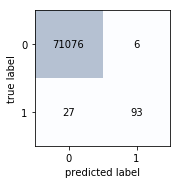

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.94      0.78      0.85       120

avg / total       1.00      1.00      1.00     71202



In [28]:
svm_2 = SVC(kernel = 'rbf', C= 10, gamma= 0.01, probability= True, random_state = 0)
svm_2.fit(X_train_2, y_train_2)
y_pred_2 = svm_2.predict(X_test_2)

cm = confusion_matrix(y_test_2, y_pred_2)
print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(classification_report(y_test_2, y_pred_2))


 test auc: 0.913351833094173


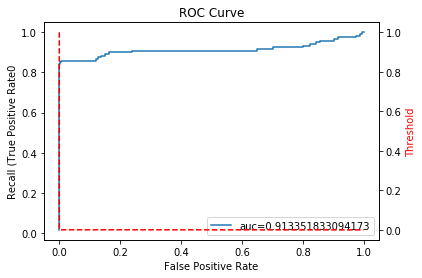

In [29]:
y_pred_prob_2 = svm_2.predict_proba(X_test_2)[:,1]
auc = roc_auc_score(y_test_2, y_pred_prob_2)
print("\n test auc:", auc)
auc_plot(y_test_2, y_pred_prob_2)

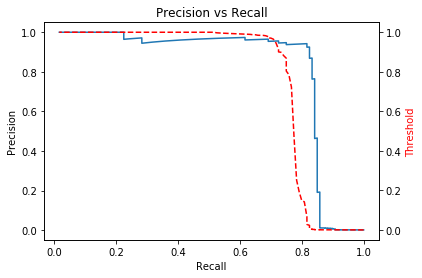

In [30]:
pre_recall_plot(y_test_2, y_pred_prob_2)

Confusion matrix, classification report, and also ROC and Precision-Recall curve all tell us that the results don't improve much (test auc slightly drops to 0.91 from 0.94 while support weighted recall and precision approximately stays the same), so there is no need to further reduce the features.

In [31]:
#Model 1 ver3: SVM, with SMOTE oversampling
sm = SMOTE(ratio ='minority', kind = 'svm', random_state=0)
X_sm, y_sm = sm.fit_sample(X_train, y_train)

[[71040    42]
 [   24    96]]


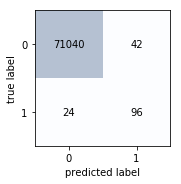

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.70      0.80      0.74       120

avg / total       1.00      1.00      1.00     71202



In [32]:
svm_sm = SVC(kernel = 'rbf', C= 10, gamma= 0.01, probability = True, random_state = 0)
svm_sm.fit(X_sm, y_sm)
y_pred_sm = svm_sm.predict(X_test)

cm = confusion_matrix(y_test, y_pred_sm)
print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(classification_report(y_test, y_pred_sm))


 test auc: 0.949479884734063


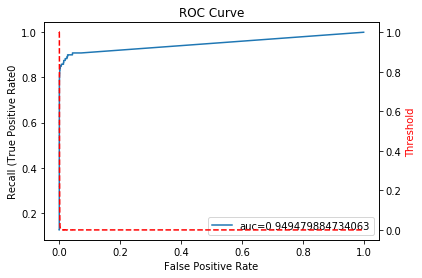

In [33]:
y_pred_sm_prob = svm_sm.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_sm_prob)
print("\n test auc:", auc)
auc_plot(y_test, y_pred_sm_prob)

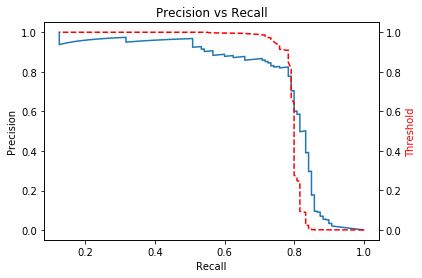

In [34]:
pre_recall_plot(y_test, y_pred_sm_prob)

We oversample the fraud class of the training data using SMOTE to adjust the class distribution of a dataset. 

As we can see from the confusion matrix and classification report, SVM gives a weighted recall of 0.80 (slightly better than our tuned SVM model), but precision (0.70) gets much lower than tuned SVM (which means for 100 fraud predictions, only 70 are actual frauds, the rest are all false alarms)for the test dataset. So overall, the improved recall might not justify the results.

ROC and Precision-Recall curves also confirm the same conclusions.

Also we should keep in mind that we might introduce other biases because of these synthetic minority samples for training,so we need to deal with care when using oversampling. 

[[71076     6]
 [   28    92]]


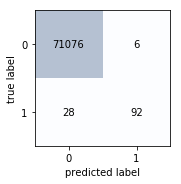

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.94      0.77      0.84       120

avg / total       1.00      1.00      1.00     71202



In [35]:
#Model 2: Random Forest 
rf = RandomForestClassifier(n_estimators=100, n_jobs= -1, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(classification_report(y_test, y_pred))


 test auc: 0.9442724013580559


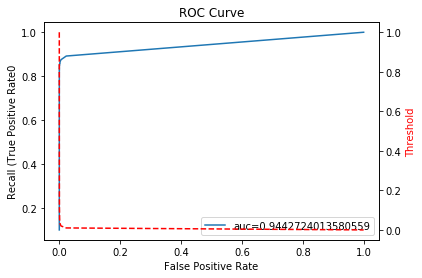

In [36]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
print("\n test auc:", auc)
auc_plot(y_test, y_pred_prob)

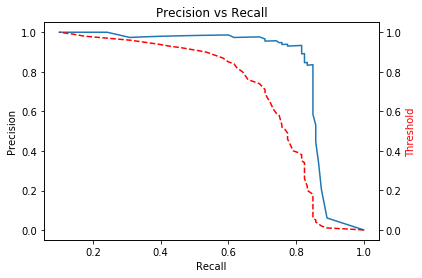

In [37]:
pre_recall_plot(y_test, y_pred_prob)

Without any parameter tuning, the random forest already achieves pretty hight precision: 0.94 and recall: 0.77 with fast training time, also in the Precision-Recall curve, we can see that this classifier has the potential to achieve even higher recall without compromising too much precision(upper right corner point) as compared to tuned SVM, so it would make sense to further explore this model to see if we can get better results.

Feature ranking:
1. feature 16 (0.226517)
2. feature 13 (0.109230)
3. feature 11 (0.101886)
4. feature 10 (0.075535)
5. feature 9 (0.064392)
6. feature 15 (0.062372)
7. feature 8 (0.028741)
8. feature 6 (0.026767)
9. feature 3 (0.025334)
10. feature 25 (0.020917)
11. feature 5 (0.020553)
12. feature 20 (0.019861)
13. feature 17 (0.019368)
14. feature 2 (0.018586)
15. feature 26 (0.015291)
16. feature 0 (0.014918)
17. feature 19 (0.014256)
18. feature 7 (0.013543)
19. feature 4 (0.012374)
20. feature 1 (0.012280)
21. feature 18 (0.011743)
22. feature 21 (0.011283)
23. feature 27 (0.011265)
24. feature 28 (0.010184)
25. feature 14 (0.010149)
26. feature 12 (0.009401)
27. feature 24 (0.009125)
28. feature 23 (0.008756)
29. feature 22 (0.007999)
30. feature 29 (0.007376)


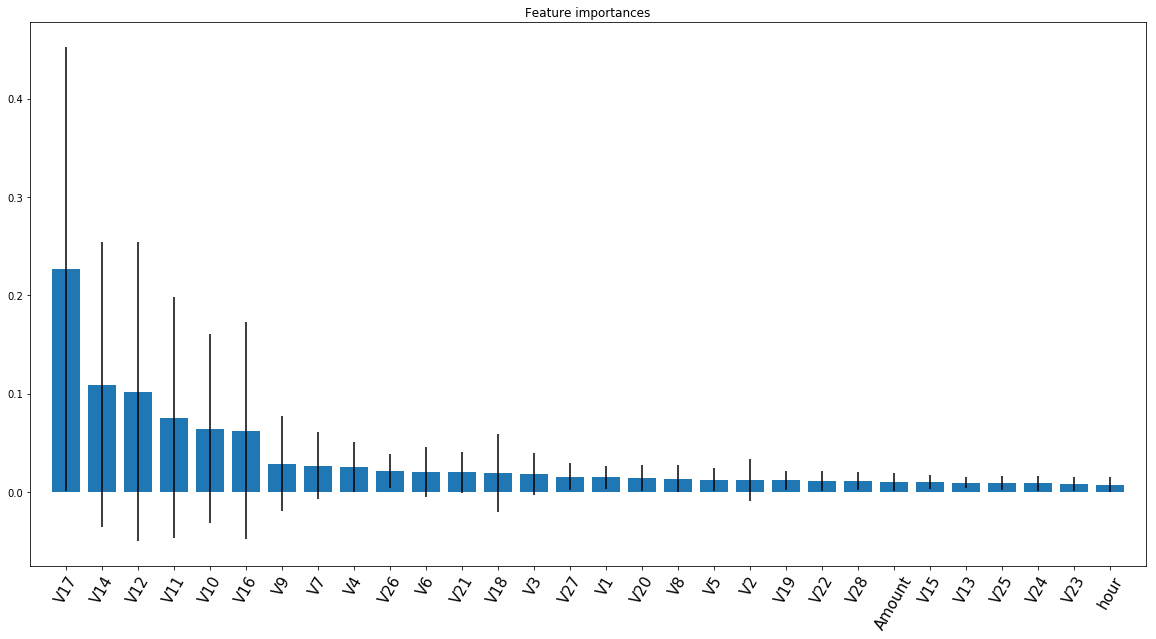

In [38]:
#Feature importances to Random Forest 
importances = rf.feature_importances_
number_to_keep = len(importances)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:number_to_keep]

print("Feature ranking:")
for f in range(len(indices)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(len(indices)), df_1.columns[indices], rotation=60, size=15)
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
#With parameters tuning
"""
param_dist = {"n_estimators":[10,50,100],
              "max_depth": [3,10],
              "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier(n_jobs= -1, random_state=0)
rf_cv = GridSearchCV(rf, param_dist, cv=5)

rf_cv.fit(X_train,y_train)

print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))
"""
#Tuned Decision Tree Parameters: {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}
#Best score is 0.9995318461646497

[[71076     6]
 [   28    92]]


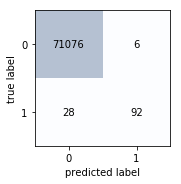

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.94      0.77      0.84       120

avg / total       1.00      1.00      1.00     71202



In [39]:
#using tuned parameters 
rf_b = RandomForestClassifier(n_estimators = 100, max_depth = 10, 
                              criterion= 'gini',n_jobs=-1, random_state = 0)
rf_b.fit(X_train, y_train)
y_pred = rf_b.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(classification_report(y_test, y_pred))


 test auc: 0.9742915459141086


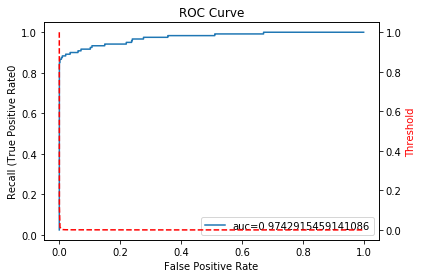

In [40]:
y_pred_prob = rf_b.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
print("\n test auc:", auc)
auc_plot(y_test, y_pred_prob)

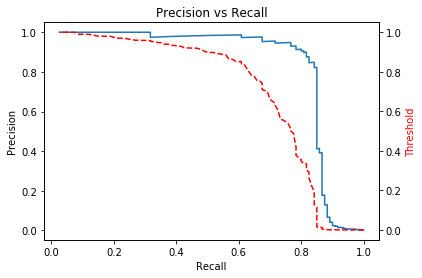

In [41]:
pre_recall_plot(y_test, y_pred_prob)

With parameter tuning, the random forest doesn't change too much on weighted recall and precision, but ROC and Precision-Recall curve slightly improve towards the ideal. Considering the overall speed of training this classifier, the tuning could be justified for better results.

In [52]:
# Model 3: A simple deep learning model
#!pip3.5 install --user np_utils
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
#from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.models import model_from_json

#define relevant metrics
def precision(y_true, y_pred):
    """Precision metric.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [43]:
n_cols = X_train.shape[1]
print(n_cols)
#y_keras = y_train 
y_keras= to_categorical(y_train)
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer= 'adam', loss ='binary_crossentropy', metrics =[precision,recall])

early_stopper = EarlyStopping(patience = 2)
history = model.fit(X_train,y_keras, epochs= 50, validation_split=0.1, callbacks=[early_stopper])
#keras.callbacks.ModelCheckpoint('/Desktop', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

30
Train on 192244 samples, validate on 21361 samples
Epoch 1/50
192244/192244 [==============================] - 11s 58us/step - loss: 0.0054 - precision: 0.9992 - recall: 0.9992 - val_loss: 0.0039 - val_precision: 0.9992 - val_recall: 0.9992
Epoch 2/50
192244/192244 [==============================] - 11s 59us/step - loss: 0.0030 - precision: 0.9993 - recall: 0.9993 - val_loss: 0.0037 - val_precision: 0.9992 - val_recall: 0.9992
Epoch 3/50
192244/192244 [==============================] - 11s 59us/step - loss: 0.0028 - precision: 0.9994 - recall: 0.9994 - val_loss: 0.0047 - val_precision: 0.9991 - val_recall: 0.9991
Epoch 4/50
192244/192244 [==============================] - 12s 60us/step - loss: 0.0026 - precision: 0.9995 - recall: 0.9995 - val_loss: 0.0047 - val_precision: 0.9990 - val_recall: 0.9990


In [44]:
model.summary()
#save model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Model saved")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 13,402
Trainable params: 13,402
Non-trainable params: 0
_________________________________________________________________
Model saved


In [45]:
print(history.history.keys())

dict_keys(['val_precision', 'loss', 'recall', 'precision', 'val_recall', 'val_loss'])


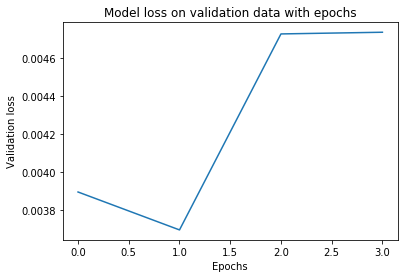

In [46]:
# plot loss on validation data
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Model loss on validation data with epochs')
plt.show()

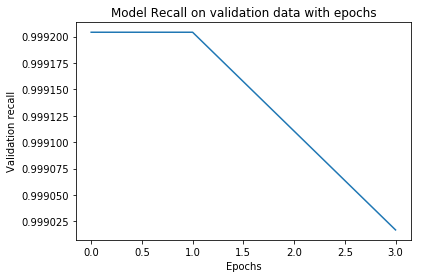

In [47]:
# plot recall on validation data
plt.plot(history.history['val_recall'])
plt.xlabel('Epochs')
plt.ylabel('Validation recall')
plt.title('Model Recall on validation data with epochs')
plt.show()

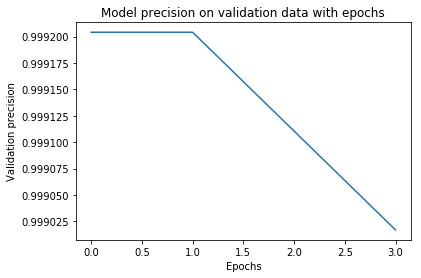

In [48]:
# plot precision on validation data
plt.plot(history.history['val_precision'])
plt.xlabel('Epochs')
plt.ylabel('Validation precision')
plt.title('Model precision on validation data with epochs')
plt.show()

[[71075     7]
 [   31    89]]


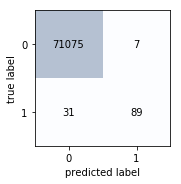

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.93      0.74      0.82       120

avg / total       1.00      1.00      1.00     71202



In [49]:
y_pred = model.predict_classes(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(classification_report(y_test, y_pred))


 test auc: 0.9788868255442071


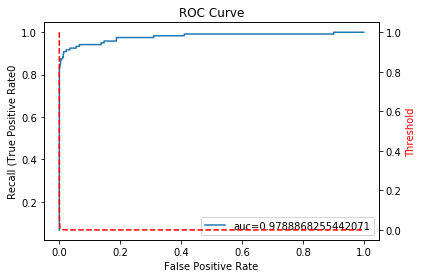

In [50]:
y_pred_prob = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
print("\n test auc:", auc)
auc_plot(y_test, y_pred_prob)

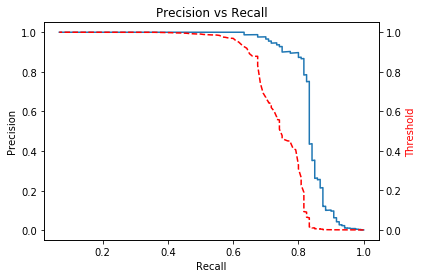

In [51]:
pre_recall_plot(y_test, y_pred_prob)

With a simple NN model, after only around 2 epochs, it achieves support weighted recall of 0.74 and precision of 0.93, with comparable ROC and Precision-Recall curve with tuned random forest and fast training time.

Overall, in terms of best results, tuned SVM out performs others.
But in terms of practical considerations of efficiency of training the model, random forests and nn model are similar in performances, so they are both apt for the detection task.

However if only one choice should be made, then I would suggest random forest as the top pick for its slightly better recall (for in real life situations we would want to capture as many frauds as possible to reduce the risk of potential financial loss, so the slight higher rate(0.2 higher) could mean a practical difference) and precision, and also ease of implementation as compared to the nn model.

The model could be built into the existing personal banking app. With more transaction histories as input data in the model,it can quickly identify the possible frauds and alert the customers, and to help prevent potential financial losses for both sides. 

## References

* (1) <https://www.forbes.com/sites/rogeraitken/2016/10/26/us-card-fraud-losses-could-exceed-12bn-by-2020/#53aa8baed243>

* (2) K.R., Seeja & Zareapoor, Masoumeh. (2014). FraudMiner: A Novel Credit Card Fraud Detection Model Based on Frequent Itemset Mining. TheScientificWorldJournal. 2014. 252797. 10.1155/2014/252797

* (3) <https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/>

* (4) Receiver Operating Characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic

* (5) Area under curve, <https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve>
